In [1]:
from strategiesavg import *
from data import *
import matplotlib.pyplot as plt

In [2]:
# Raw
d0 = get_hf_data()
# Outliers
d1 = get_hf_data(filter_outliers=True)
# Scaling
d2 = get_hf_data(scaling='z-score')
d3 = get_hf_data(scaling='minmax')
# Outliers and scaling
d4 = get_hf_data(filter_outliers=True, scaling='z-score')
d5 = get_hf_data(filter_outliers=True, scaling='minmax')

dfs = [d0,d1,d2,d3,d4,d5]
balancings = [None, 'undersample', 'oversample', 'smote']

  3%|▎         | 4/150 [00:00<00:03, 37.34it/s]

Index:  0 balancing: None


100%|██████████| 150/150 [00:22<00:00,  6.61it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.69
Params: (5, 0.9, 300)


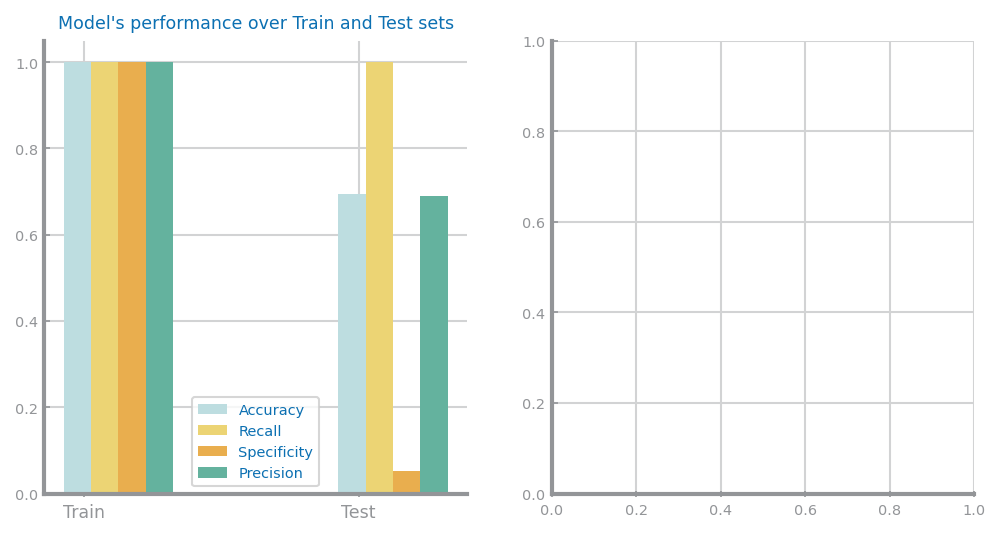

  3%|▎         | 4/150 [00:00<00:04, 35.65it/s]

Results: {'Accuracy': [1.0, 0.6949152542372882], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.05263157894736842], 'Precision': [1.0, 0.6896551724137931]}

------


Index:  0 balancing: undersample


100%|██████████| 150/150 [00:19<00:00,  7.72it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.73
Params: (10, 0.1, 50)


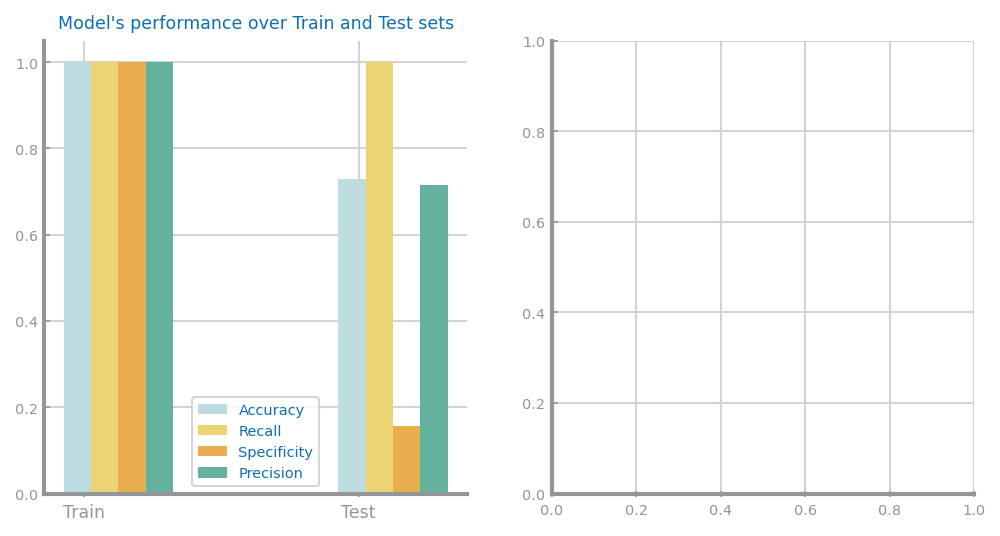

  3%|▎         | 4/150 [00:00<00:04, 30.13it/s]

Results: {'Accuracy': [1.0, 0.7288135593220338], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.15789473684210525], 'Precision': [1.0, 0.7142857142857143]}

------


Index:  0 balancing: oversample


100%|██████████| 150/150 [00:26<00:00,  5.64it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.69
Params: (5, 0.9, 50)


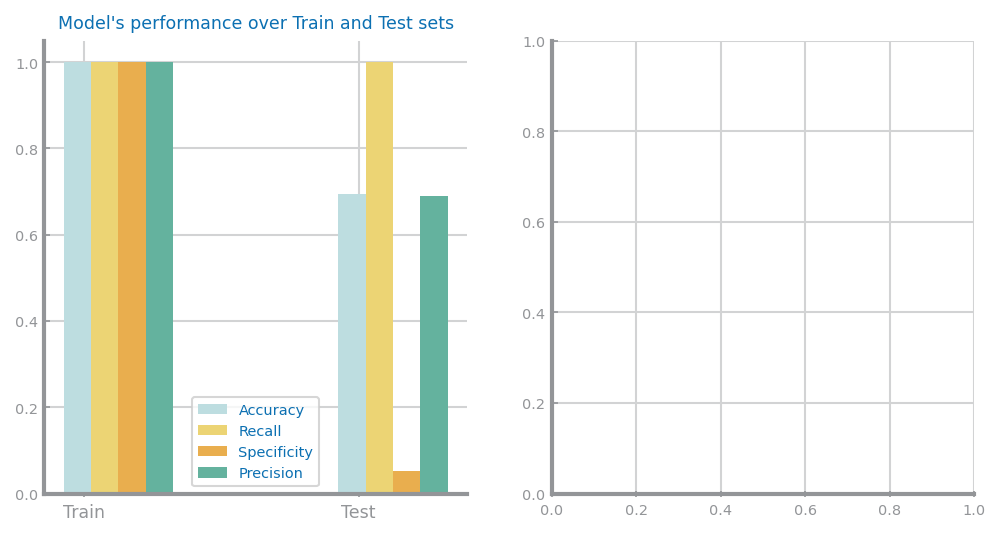

  3%|▎         | 4/150 [00:00<00:04, 30.60it/s]

Results: {'Accuracy': [1.0, 0.6949152542372882], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.05263157894736842], 'Precision': [1.0, 0.6896551724137931]}

------


Index:  0 balancing: smote


100%|██████████| 150/150 [00:32<00:00,  4.63it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.68
Params: (5, 0.1, 75)


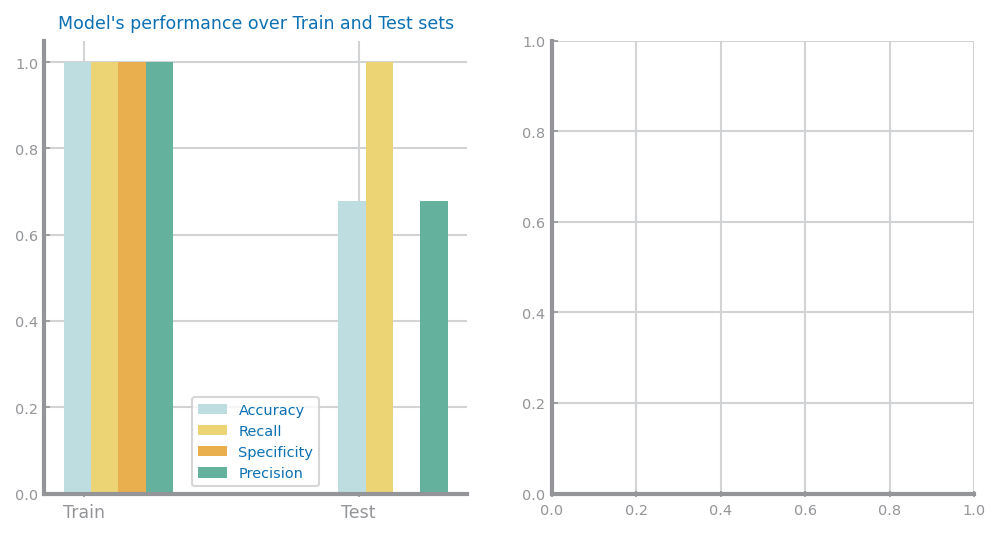

  3%|▎         | 5/150 [00:00<00:05, 27.25it/s]

Results: {'Accuracy': [1.0, 0.6779661016949152], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.0], 'Precision': [1.0, 0.6779661016949152]}

------


Index:  1 balancing: None


100%|██████████| 150/150 [00:25<00:00,  5.93it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.70
Params: (5, 0.1, 10)


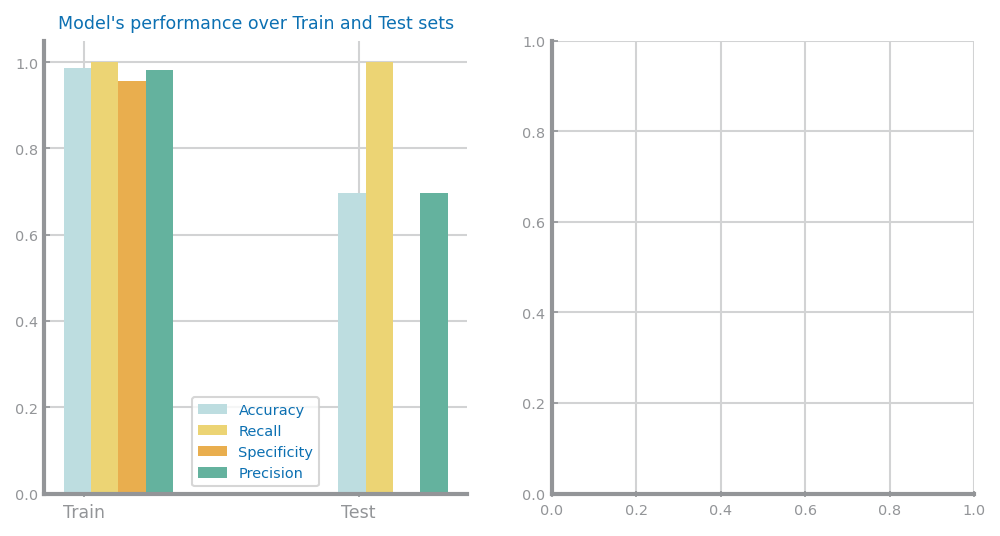

  3%|▎         | 5/150 [00:00<00:04, 29.45it/s]

Results: {'Accuracy': [0.986784140969163, 0.6964285714285714], 'Recall': [1.0, 1.0], 'Specificity': [0.9571428571428572, 0.0], 'Precision': [0.98125, 0.6964285714285714]}

------


Index:  1 balancing: undersample


100%|██████████| 150/150 [00:18<00:00,  8.11it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.73
Params: (10, 0.3, 250)


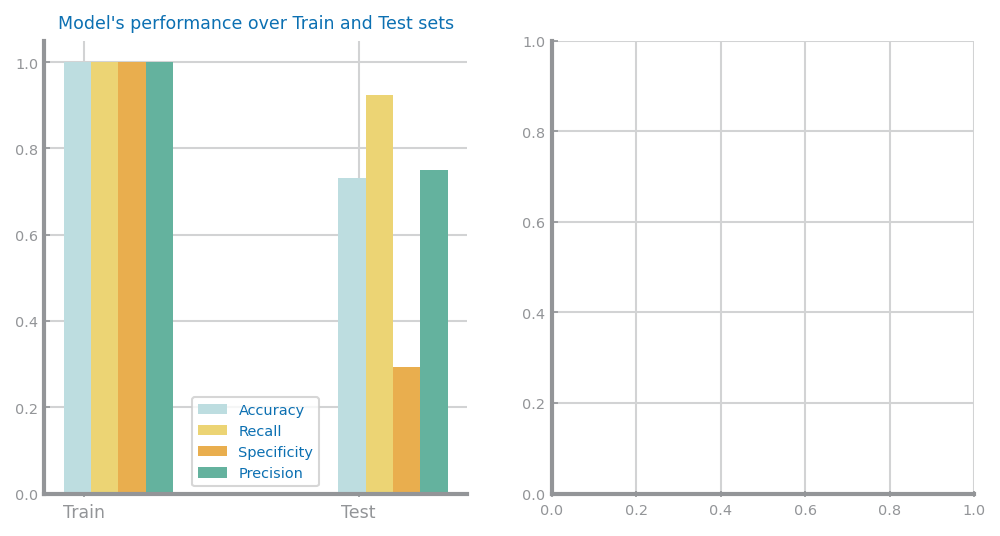

  3%|▎         | 4/150 [00:00<00:04, 34.39it/s]

Results: {'Accuracy': [1.0, 0.7321428571428571], 'Recall': [1.0, 0.9230769230769231], 'Specificity': [1.0, 0.29411764705882354], 'Precision': [1.0, 0.75]}

------


Index:  1 balancing: oversample


100%|██████████| 150/150 [00:27<00:00,  5.52it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.70
Params: (5, 0.1, 5)


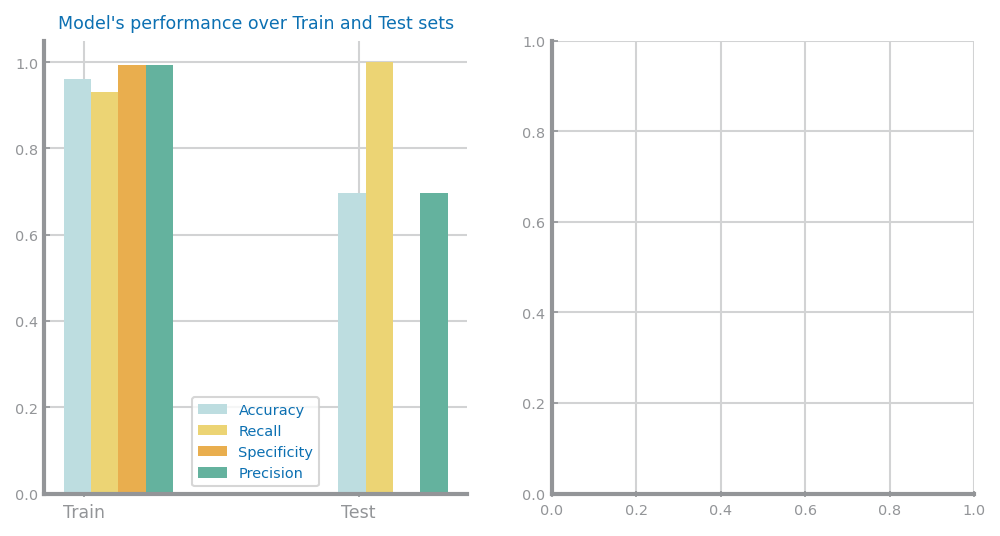

  3%|▎         | 4/150 [00:00<00:05, 27.38it/s]

Results: {'Accuracy': [0.9617834394904459, 0.6964285714285714], 'Recall': [0.9299363057324841, 1.0], 'Specificity': [0.9936305732484076, 0.0], 'Precision': [0.9931972789115646, 0.6964285714285714]}

------


Index:  1 balancing: smote


100%|██████████| 150/150 [00:34<00:00,  4.38it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.71
Params: (5, 0.5, 25)


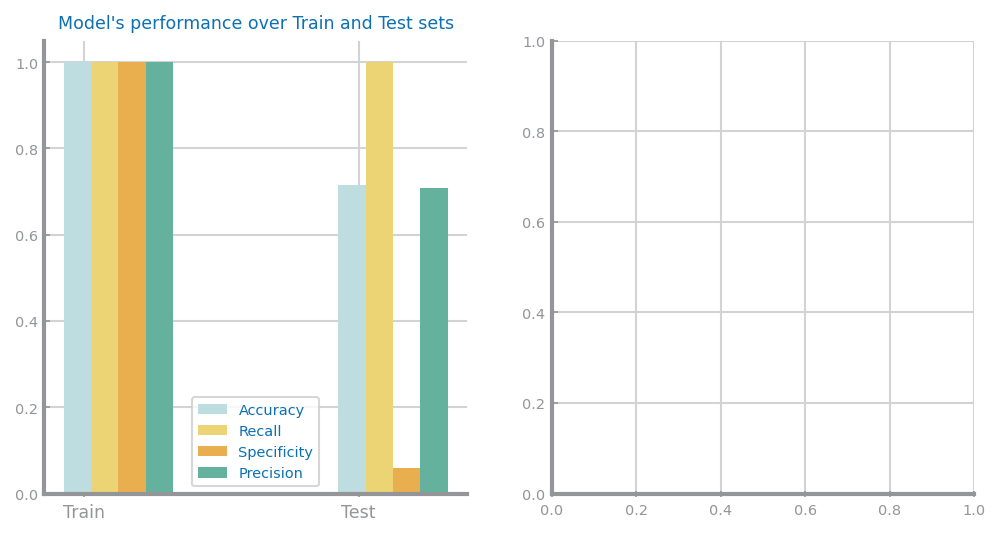

  3%|▎         | 4/150 [00:00<00:04, 31.14it/s]

Results: {'Accuracy': [1.0, 0.7142857142857143], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.058823529411764705], 'Precision': [1.0, 0.7090909090909091]}

------


Index:  2 balancing: None


100%|██████████| 150/150 [00:22<00:00,  6.61it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.68
Params: (5, 0.1, 100)


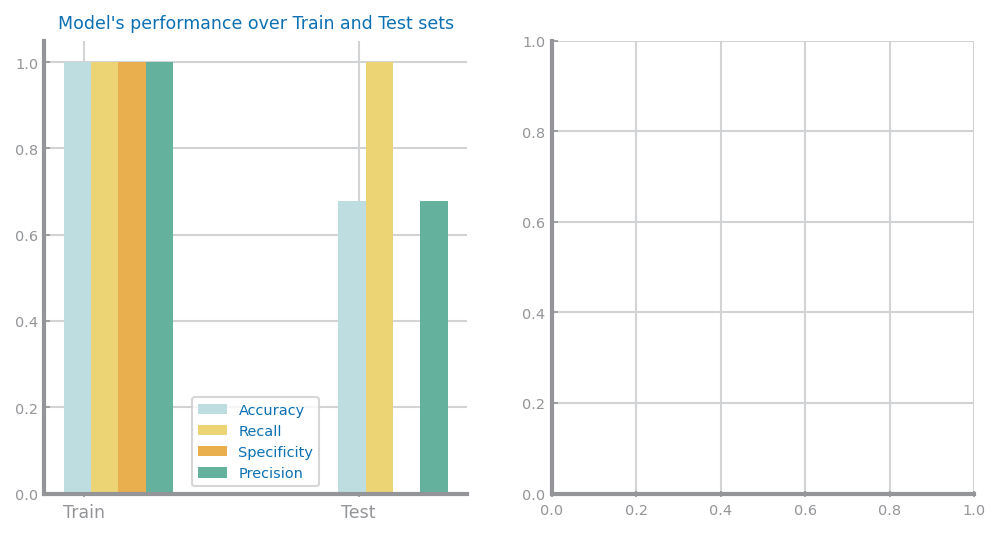

  3%|▎         | 4/150 [00:00<00:03, 38.56it/s]

Results: {'Accuracy': [1.0, 0.6779661016949152], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.0], 'Precision': [1.0, 0.6779661016949152]}

------


Index:  2 balancing: undersample


100%|██████████| 150/150 [00:18<00:00,  8.01it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.71
Params: (5, 0.3, 100)


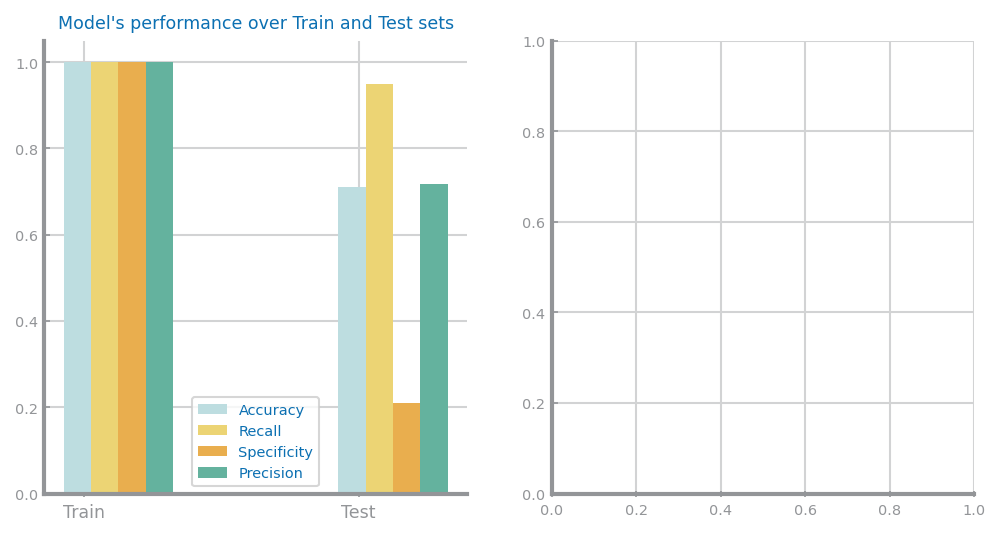

  3%|▎         | 4/150 [00:00<00:05, 27.61it/s]

Results: {'Accuracy': [1.0, 0.711864406779661], 'Recall': [1.0, 0.95], 'Specificity': [1.0, 0.21052631578947367], 'Precision': [1.0, 0.7169811320754716]}

------


Index:  2 balancing: oversample


100%|██████████| 150/150 [00:25<00:00,  5.79it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.68
Params: (5, 0.1, 25)


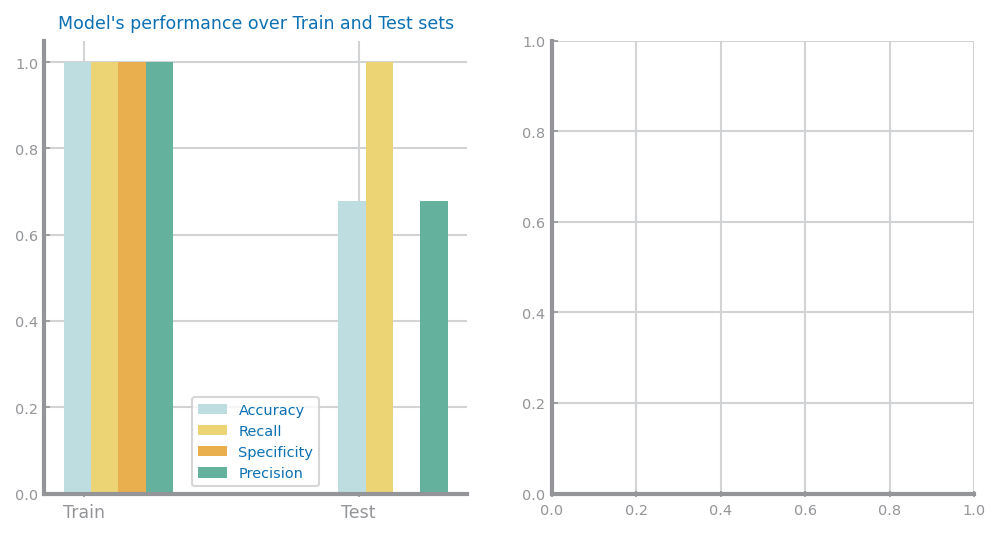

  3%|▎         | 4/150 [00:00<00:04, 29.49it/s]

Results: {'Accuracy': [1.0, 0.6779661016949152], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.0], 'Precision': [1.0, 0.6779661016949152]}

------


Index:  2 balancing: smote


100%|██████████| 150/150 [00:30<00:00,  4.92it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.69
Params: (5, 0.5, 10)


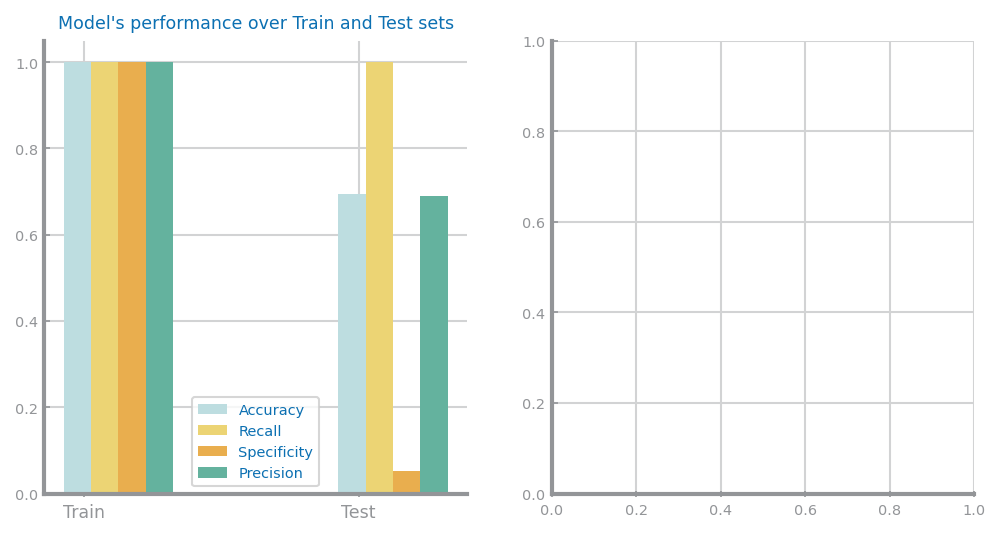

  3%|▎         | 4/150 [00:00<00:04, 31.06it/s]

Results: {'Accuracy': [1.0, 0.6949152542372882], 'Recall': [1.0, 1.0], 'Specificity': [1.0, 0.05263157894736842], 'Precision': [1.0, 0.6896551724137931]}

------


Index:  3 balancing: None


 63%|██████▎   | 94/150 [00:12<00:11,  4.72it/s]

In [ ]:
best = ("", 0)

for i, df in enumerate(dfs):
    for bal in balancings:
        print("Index: ", i, "balancing:", bal)
        params, results = XGBoostKFold(df, "DEATH_EVENT", balancing=bal)
        accuracy = results["Accuracy"][1]
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Params: {params}')
        plt.pause(0.1)
        print("Results:", results)
        print("\n------\n\n")
        if (accuracy > best[1]):
            if bal == None: bal = "None"
            best = (str(i) + "," + bal, accuracy)
            
print(best)